# Problème de JDR :

On veut trouver ce qui donne le meilleur résultat entre jeter deux paires de dés chacune de leur côté et ne compter que la plus petite somme des deux ou jeter trois dés et ne sommer que les plus petits. 

## Jeter deux fois deux dés : 

- On peut déjà associer chaque dé à une variable aléatoire : $D_1, D_2, D_3, D_4 \sim U\{1,2,3,4,5,6\}$. On a donc $P(D_i=k)=\frac{1}{6} ; \forall i \in \{1,2,3,4\}, \forall k \in \{1, 2, 3, 4, 5, 6\}$

On peut ensuite construire deux variables aléatoires corréspondant à chaque somme de paire de dés : $S_1 = D_1 + D_2 ; S_2 = D_3 + D_4$. Et on peut maintenant trouver "à la voix" leurs probas correspondantes.

- On remarque que comme **les jetés de $D_1$ et $D_2$ sont indépendents** on a que $P(D_1=k \cup D_2 = l) = P(D_1 = k)*P(D_2=l)=(\frac{1}{6})^2= \frac{1}{36}$

> En raisonnant de la même façon on a donc $P(S_1=2)=P(S_1=12)=\frac{1}{36} ; P(S_1=3)=P(S_1=11)=\frac{2}{36} ; P(S_1=4)=P(S_1=10)=\frac{3}{36} ; P(S_1=5)=P(S_1=9)=\frac{4}{36} ; P(S_1=6)=P(S_1=8)=\frac{5}{36} ; P(S_1=7) = \frac{6}{36}$ et on a exactement les mêmes probas pour $S_2$ la somme des deux autres dés.

> De façon plus rigoureuse : $P(S_1=k) = \frac{min(k, 14-k)-1}{36}$

- Maintenant on veut trouver le minimum de $S_1$ et $S_2$ dont on connait les lois. On peut alors se demander la probabilité que le minimum des deux sommes soit égal à $k$ et raisonner à partir de ça : 

Si le minimum est égal à 8 cela veut dire que la somme 1 et égale à 8 et que l'autre est plus grande que 8 ou inversement. On a donc $S_1=8$ et $S_2 = 8, 9, 10, 11, 12$ ou inversemment (**ATTENTION** : si on fait ça on compte deux fois le cas $S_1=8$ et $S_2=8$). D'où $P(min(S_1, S_2)=8)=P(S_1=8)*P(S_2 \ge 8) + P(S_2=8)*P(S_1 \ge 8) - P(S_1=8)P(S_2=8)= \frac{5}{36} * (\frac{5}{36} + \frac{4}{36} + \frac{3}{36} + \frac{2}{36} + \frac{1}{36}) + \frac{5}{36} * (\frac{5}{36} + \frac{4}{36} + \frac{3}{36} + \frac{2}{36} + \frac{1}{36}) - \frac{5}{36} * \frac{5}{36} = \frac{125}{1296}$ 


> En faisant pareil pour les autres on a : $P(min(S_1, S_2)=2)= 71/1296 ; P(min(S_1, S_2)=3)= 17/162 ; P(min(S_1, S_2)=4)= 7/48 ; P(min(S_1, S_2)=5)= 14/81 ; P(min(S_1, S_2)=6)= 235/1296 ; P(min(S_1, S_2)=7)= 1/6 ; P(min(S_1, S_2)=8)= 125/1296 ; P(min(S_1, S_2)=9)= 4/81 ; P(min(S_1, S_2)=10)= 1/48 ; P(min(S_1, S_2)=11)= 1/162 ; P(min(S_1, S_2)=12)= 1/1296$

> De façon plus rigoureuse :  $P(min(S_1, S_2)=k)=2*P(S_1=k)*\sum_{i=k}^{12}(P(S_1=i))-P(S_1=k)^2$

- On peut désormais faire la sommes des valeurs possibles fois leurs probas pour trouver une **moyenne de  $\frac{3647}{648} \approx$ 5.628086419753086** (c.f le code ci dessous).





In [43]:
#à chaque valeurs de k, on associe la probabilité que la somme des dés soit égale à k
proba_somme={}
for k in range(2,7):
    proba_somme[k]=(k-1)/36
    proba_somme[14-k]=(k-1)/36
proba_somme[7]=1/6
print("{valeurs de la somme : proba associée}\n", proba_somme)


#à chaque valeurs de k, on associe la probabilité que le minimum des somme des dés soit égal à k
proba_min={}
for k in range(2, 13):
    s=0
    for i in range(k, 13):
        s+=proba_somme[i]
    proba_min[k]=2*proba_somme[k]*s - proba_somme[k]**2
print("{valeurs du min : proba associée}\n", proba_min)


#on calcule la moyenne du minimum
Somme_Moyenne=0
for key in proba_min:
    Somme_Moyenne+=key*proba_min[key]
print(f"La somme moyenne du minimum est {float(Somme_Moyenne)}")

{valeurs de la somme : proba associée}
 {2: 1/36, 12: 1/36, 3: 1/18, 11: 1/18, 4: 1/12, 10: 1/12, 5: 1/9, 9: 1/9, 6: 5/36, 8: 5/36, 7: 1/6}
{valeurs du min : proba associée}
 {2: 71/1296, 3: 17/162, 4: 7/48, 5: 14/81, 6: 235/1296, 7: 1/6, 8: 125/1296, 9: 4/81, 10: 1/48, 11: 1/162, 12: 1/1296}
La somme moyenne du minimum est 5.628086419753086


### Simulation 

On peut vérifier ça en simulant des dés : 

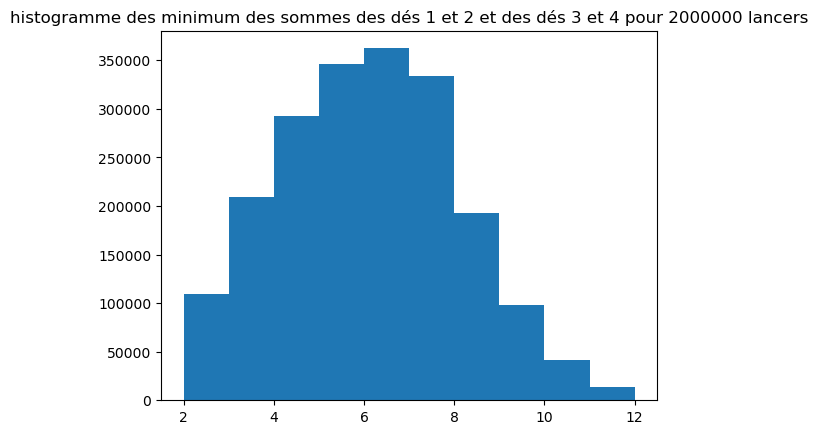

En simulant 2000000 lancer on trouve une moyenne de 5.6261585 pour le minimum des sommes des dés 1 et 2 et des dés 3 et 4


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import random

n=2000000 #nombre de lancers
D_1=[random.randint(1,6) for i in range(n)]#on simule les jétés du dé 1
D_2=[random.randint(1,6) for i in range(n)]#on simule les jétés du dé 2
D_3=[random.randint(1,6) for i in range(n)]#on simule les jétés du dé 3
D_4=[random.randint(1,6) for i in range(n)]#on simule les jétés du dé 4
S_1=np.add(D_1, D_2)#on simule la somme des dés 1 et 2
S_2=np.add(D_3,D_4)#on simule la somme des dés 3 et 4
M_1=np.minimum(S_1,S_2)#on simule le minimum des sommes des dés 1 et 2 et des dés 3 et 4
moyenne=np.mean(M_1)#on calcule la moyenne du minimum

#on fait un histogramme des moyennes
plt.hist(M_1, bins=range(2,13))
plt.title(f"histogramme des minimum des sommes des dés 1 et 2 et des dés 3 et 4 pour {n} lancers")
plt.show()
print(f"En simulant {n} lancer on trouve une moyenne de {moyenne} pour le minimum des sommes des dés 1 et 2 et des dés 3 et 4")

## Jeter 3 dés et ne garder que les deux plus faibles :

Pour ce cas là les maths sont beaucoup plus compliquées et je les noterais peut être une autre fois, on va faire des simulations pour l'instant. 


### Simulation

On lance un grand nombre de triplet de dé en sommant les plus faibles à chaque fois




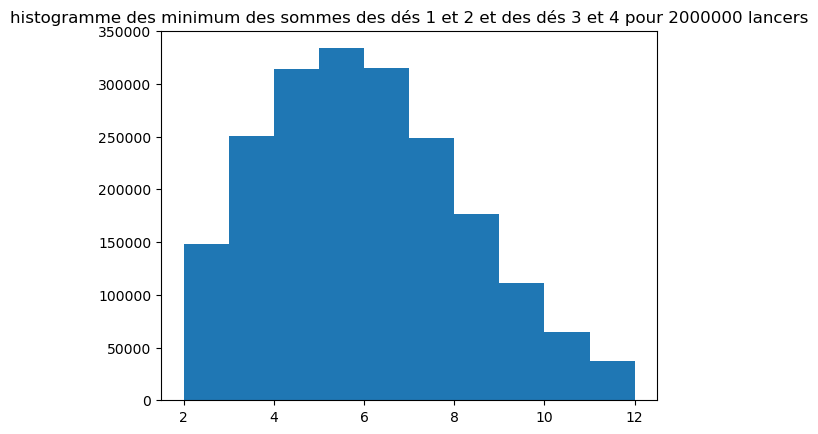

en simulant 2000000 lancer on trouve une moyenne de 5.5419815 pour le minimum des sommes des dés 1 et 2 et des dés 3 et 4


In [48]:
n=2000000 #nombre de lancers
D_1=[random.randint(1,6) for i in range(n)]#on simule les jétés du dé 1
D_2=[random.randint(1,6) for i in range(n)]#on simule les jétés du dé 2
D_3=[random.randint(1,6) for i in range(n)]#on simule les jétés du dé 3

S=[0 for i in range(n)]
for k in range(n):
    #si le maximum est D_1 on ajoute D_2 et D_3
    if np.max([D_1[k], D_2[k], D_3[k]])==D_1[k]:
        S[k]=(D_2[k]+D_3[k])
    #si le maximum est D_2 on ajoute D_1 et D_3
    elif np.max([D_1[k], D_2[k], D_3[k]])==D_2[k]:
        S[k]=(D_1[k]+D_3[k])
    #si le maximum est D_3 on ajoute D_1 et D_2
    else:
        S[k]=(D_1[k]+D_2[k])
    
moyenne=np.mean(S)#on calcule la moyenne du minimum
#on fait un histogramme des moyennes
plt.hist(S, bins=range(2,13))
plt.title(f"histogramme des minimum des sommes des dés 1 et 2 et des dés 3 et 4 pour {n} lancers")
plt.show()

print(f"en simulant {n} lancer on trouve une moyenne de {moyenne} pour le minimum des sommes des dés 1 et 2 et des dés 3 et 4")


## Bilan :

> **La première méthode donne un jeté moyen à 5,628** alors que **la deuxième méthode donne un jeté moyen à 5,542**. La deuxième méthode est donc plus punitive (de façon negligeable dans le cadre d'un JDR)

> La seconde méthode a aussi plus de chance d'atteindre des valeurs extrèmes (plus de deux fois plus de simulation de réussite critique) si on se fie aux histogrammes alors que la première méthode a des jets beaucoup plus centrés autour de 5-6 et cela alors que la deuxième méthode a une réussite moyenne plus faible